# Assignment: Ionosphere Data Problem

### Dataset Description: 

This radar data was collected by a system in Goose Bay, Labrador. This system consists of a phased array of 16 high-frequency antennas with a total transmitted power on the order of 6.4 kilowatts. See the paper for more details. The targets were free electrons in the ionosphere. "Good" radar returns are those showing evidence of some type of structure in the ionosphere. "Bad" returns are those that do not; their signals pass through the ionosphere.

Received signals were processed using an autocorrelation function whose arguments are the time of a pulse and the pulse number. There were 17 pulse numbers for the Goose Bay system. Instances in this databse are described by 2 attributes per pulse number, corresponding to the complex values returned by the function resulting from the complex electromagnetic signal.

### Attribute Information:

- All 34 are continuous
- The 35th attribute is either "good" or "bad" according to the definition summarized above. This is a binary classification task.

 <br><br>

<table border="1"  cellpadding="6">
	<tbody>
        <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Data Set Characteristics:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">Multivariate</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Instances:</b></p></td>
		<td><p class="normal">351</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Area:</b></p></td>
		<td><p class="normal">Physical</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">
    <tbody>
        <tr>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Attribute Characteristics:</b></p></td>
            <td><p class="normal">Integer,Real</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Number of Attributes:</b></p></td>
            <td><p class="normal">34</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Date Donated</b></p></td>
            <td><p class="normal">N/A</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">	
    <tbody>
    <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Associated Tasks:</b></p></td>
		<td><p class="normal">Classification</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Missing Values?</b></p></td>
		<td><p class="normal">N/A</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Web Hits:</b></p></td>
		<td><p class="normal">N/A</p></td>
	</tr>
    </tbody>
    </table>

### WORKFLOW :
- Load Data
- Check Missing Values ( If Exist ; Fill each record with mean of its feature ) or any usless column.
- Shuffle the data if needed.
- Standardized the Input Variables. **Hint**: Centeralized the data
- Split into 60 and 40 ratio.
- Encode labels.
- Model : 1 hidden layers including 16 unit.
- Compilation Step (Note : Its a Binary problem , select loss , metrics according to it)
- Train the Model with Epochs (100).
- If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .
- Prediction should be > **92%**
- Evaluation Step
- Prediction


# Load Data:
[Click Here to Download DataSet](https://github.com/ramsha275/ML_Datasets/blob/main/ionosphere_data.csv)

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Load Data

In [2]:
data = pd.read_csv("data/ionosphere_data.csv")
data

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,g
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,g
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,g
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,g


In [3]:
# np.unique(data['label'])

## preparing data and checking missing values

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 35 columns):
feature1     351 non-null int64
feature2     351 non-null int64
feature3     351 non-null float64
feature4     351 non-null float64
feature5     351 non-null float64
feature6     351 non-null float64
feature7     351 non-null float64
feature8     351 non-null float64
feature9     351 non-null float64
feature10    351 non-null float64
feature11    351 non-null float64
feature12    351 non-null float64
feature13    351 non-null float64
feature14    351 non-null float64
feature15    351 non-null float64
feature16    351 non-null float64
feature17    351 non-null float64
feature18    351 non-null float64
feature19    351 non-null float64
feature20    351 non-null float64
feature21    351 non-null float64
feature22    351 non-null float64
feature23    351 non-null float64
feature24    351 non-null float64
feature25    351 non-null float64
feature26    351 non-null float64
feature27    35

In [5]:
data.describe()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34
count,351.000000,351.0,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,...,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,0.891738,0.0,0.641342,0.044372,0.601068,0.115889,0.550095,0.119360,0.511848,0.181345,...,0.396135,-0.071187,0.541641,-0.069538,0.378445,-0.027907,0.352514,-0.003794,0.349364,0.014480
std,0.311155,0.0,0.497708,0.441435,0.519862,0.460810,0.492654,0.520750,0.507066,0.483851,...,0.578451,0.508495,0.516205,0.550025,0.575886,0.507974,0.571483,0.513574,0.522663,0.468337
min,0.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,0.0,0.472135,-0.064735,0.412660,-0.024795,0.211310,-0.054840,0.087110,-0.048075,...,0.000000,-0.332390,0.286435,-0.443165,0.000000,-0.236885,0.000000,-0.242595,0.000000,-0.165350
50%,1.000000,0.0,0.871110,0.016310,0.809200,0.022800,0.728730,0.014710,0.684210,0.018290,...,0.553890,-0.015050,0.708240,-0.017690,0.496640,0.000000,0.442770,0.000000,0.409560,0.000000
75%,1.000000,0.0,1.000000,0.194185,1.000000,0.334655,0.969240,0.445675,0.953240,0.534195,...,0.905240,0.156765,0.999945,0.153535,0.883465,0.154075,0.857620,0.200120,0.813765,0.171660
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
data.drop_duplicates()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,g
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,g
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,g
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,g


In [7]:
# mapping labels
# 1 for good and 0 for bad
lbls = {'g':1,'b':0}

# data.label.str.lower()
data.label = data.label.map(lbls)
data

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,1
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,0
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,1
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,0
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,1
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,1
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,1
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,1


## data shuffling

In [8]:
# shuffling data
data = data.sample(frac = 1)
data

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
251,1,0,0.87048,0.38027,0.64099,0.69212,0.31347,0.86625,-0.03933,0.90740,...,-0.66421,0.38544,-0.51568,0.52573,-0.29897,0.56239,-0.05938,0.51460,0.16645,1
207,1,0,0.47368,-0.10526,0.83781,0.01756,0.83155,0.02615,0.68421,-0.05263,...,0.21053,0.65419,0.08968,0.52632,-0.21053,0.60150,0.09534,0.57418,0.09719,1
209,1,0,1.00000,0.45455,1.00000,0.54545,0.81818,0.63636,1.00000,-0.09091,...,-0.09091,1.00000,0.08867,1.00000,0.36364,1.00000,0.63636,0.72727,0.27273,1
181,1,0,1.00000,0.24077,0.99815,0.00369,0.80244,-0.30133,0.89919,-0.23486,...,-0.52142,0.29208,-0.48390,0.12777,-0.39143,0.15657,-0.51329,0.18353,-0.46603,1
173,1,0,1.00000,0.45455,1.00000,-0.45455,1.00000,0.09091,1.00000,-0.09091,...,-0.09091,1.00000,-0.04914,1.00000,0.45455,1.00000,-0.27273,1.00000,-0.18182,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,1,0,0.93658,0.35107,0.75254,0.65640,0.45571,0.88576,0.15323,0.95776,...,-0.84951,-0.04578,-0.91221,0.27330,-0.85762,0.54827,-0.69613,0.74828,-0.44173,1
14,1,0,1.00000,0.07380,1.00000,0.03420,1.00000,-0.05563,1.00000,0.08764,...,0.20033,1.00000,0.36743,0.95603,0.48641,1.00000,0.32492,1.00000,0.46712,1
303,1,0,0.94052,-0.01531,0.94170,0.01001,0.94994,-0.01472,0.95878,-0.01060,...,-0.04476,0.92695,-0.05827,0.90342,-0.07479,0.91991,-0.07244,0.92049,-0.07420,1
110,1,0,0.65909,-0.62879,0.00000,0.00000,0.00000,0.00000,0.77273,1.00000,...,0.00000,1.00000,-0.93939,-0.12879,-0.93182,0.00000,0.00000,0.00000,0.00000,0


## featurs extracting

In [9]:
feature_x = data.loc[:, 'feature1':'feature34']
feature_x

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34
251,1,0,0.87048,0.38027,0.64099,0.69212,0.31347,0.86625,-0.03933,0.90740,...,0.15552,-0.66421,0.38544,-0.51568,0.52573,-0.29897,0.56239,-0.05938,0.51460,0.16645
207,1,0,0.47368,-0.10526,0.83781,0.01756,0.83155,0.02615,0.68421,-0.05263,...,0.42105,0.21053,0.65419,0.08968,0.52632,-0.21053,0.60150,0.09534,0.57418,0.09719
209,1,0,1.00000,0.45455,1.00000,0.54545,0.81818,0.63636,1.00000,-0.09091,...,1.00000,-0.09091,1.00000,0.08867,1.00000,0.36364,1.00000,0.63636,0.72727,0.27273
181,1,0,1.00000,0.24077,0.99815,0.00369,0.80244,-0.30133,0.89919,-0.23486,...,0.23966,-0.52142,0.29208,-0.48390,0.12777,-0.39143,0.15657,-0.51329,0.18353,-0.46603
173,1,0,1.00000,0.45455,1.00000,-0.45455,1.00000,0.09091,1.00000,-0.09091,...,1.00000,-0.09091,1.00000,-0.04914,1.00000,0.45455,1.00000,-0.27273,1.00000,-0.18182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,1,0,0.93658,0.35107,0.75254,0.65640,0.45571,0.88576,0.15323,0.95776,...,-0.36799,-0.84951,-0.04578,-0.91221,0.27330,-0.85762,0.54827,-0.69613,0.74828,-0.44173
14,1,0,1.00000,0.07380,1.00000,0.03420,1.00000,-0.05563,1.00000,0.08764,...,1.00000,0.20033,1.00000,0.36743,0.95603,0.48641,1.00000,0.32492,1.00000,0.46712
303,1,0,0.94052,-0.01531,0.94170,0.01001,0.94994,-0.01472,0.95878,-0.01060,...,0.92049,-0.04476,0.92695,-0.05827,0.90342,-0.07479,0.91991,-0.07244,0.92049,-0.07420
110,1,0,0.65909,-0.62879,0.00000,0.00000,0.00000,0.00000,0.77273,1.00000,...,0.00000,0.00000,1.00000,-0.93939,-0.12879,-0.93182,0.00000,0.00000,0.00000,0.00000


In [10]:
label_y = data['label']
label_y

251    1
207    1
209    1
181    1
173    1
      ..
310    1
14     1
303    1
110    0
231    1
Name: label, Length: 351, dtype: int64

## spliting training and testing data

In [11]:
train_data = feature_x[:((len(feature_x) * 60) // 100)]
test_data = feature_x[((len(feature_x) * 60) // 100):]

train_label = label_y[:((len(label_y) * 60) // 100)] 
test_label = label_y[((len(label_y) * 60) // 100):]

In [12]:
val_x = train_data[((len(train_data) * 20) // 100):]     # split data into 20%  for validation
val_y = train_label[((len(train_label) * 20) // 100):]

train_x = train_data[:((len(train_data) * 20) // 100)]      # split data into 50%  for training
train_y = train_label[:((len(train_label) * 20) // 100)]

## instatiating model

In [13]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(34, activation= 'relu', input_shape = (train_data.shape[1],  ) ))
model.add(layers.Dense(16, activation='relu'))
# model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(4, activation = 'relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Using TensorFlow backend.


## compiling model

In [14]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics= ['acc'] )#binary_crossentropy

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


## training model

In [15]:
model.fit(train_x, train_y, epochs=100, validation_data=(val_x, val_y))


Train on 42 samples, validate on 168 samples
Epoch 1/100
42/42 [==============================] - 0s 4ms/step - loss: 0.7621 - acc: 0.3571 - val_loss: 0.6929 - val_acc: 0.5000
Epoch 2/100
42/42 [==============================] - 0s 214us/step - loss: 0.6662 - acc: 0.6190 - val_loss: 0.6614 - val_acc: 0.5179
Epoch 3/100
42/42 [==============================] - 0s 190us/step - loss: 0.6232 - acc: 0.5952 - val_loss: 0.6453 - val_acc: 0.5357
Epoch 4/100
42/42 [==============================] - 0s 214us/step - loss: 0.5946 - acc: 0.6190 - val_loss: 0.6336 - val_acc: 0.5655
Epoch 5/100
42/42 [==============================] - 0s 214us/step - loss: 0.5745 - acc: 0.6429 - val_loss: 0.6232 - val_acc: 0.5774
Epoch 6/100
42/42 [==============================] - 0s 286us/step - loss: 0.5576 - acc: 0.6429 - val_loss: 0.6146 - val_acc: 0.6131
Epoch 7/100
42/42 [==============================] - 0s 286us/step - loss: 0.5354 - acc: 0.8095 - val_loss: 0.6052 - val_acc: 0.6429
Epoch 8/100
42/42 [======

42/42 [==============================] - 0s 262us/step - loss: 0.1289 - acc: 0.9524 - val_loss: 0.4291 - val_acc: 0.7857
Epoch 61/100
42/42 [==============================] - 0s 167us/step - loss: 0.1276 - acc: 0.9524 - val_loss: 0.4247 - val_acc: 0.7976
Epoch 62/100
42/42 [==============================] - 0s 214us/step - loss: 0.1251 - acc: 0.9524 - val_loss: 0.4260 - val_acc: 0.7976
Epoch 63/100
42/42 [==============================] - 0s 214us/step - loss: 0.1231 - acc: 0.9524 - val_loss: 0.4292 - val_acc: 0.7976
Epoch 64/100
42/42 [==============================] - 0s 214us/step - loss: 0.1213 - acc: 0.9524 - val_loss: 0.4188 - val_acc: 0.7976
Epoch 65/100
42/42 [==============================] - 0s 190us/step - loss: 0.1195 - acc: 0.9524 - val_loss: 0.4315 - val_acc: 0.7976
Epoch 66/100
42/42 [==============================] - 0s 190us/step - loss: 0.1189 - acc: 0.9524 - val_loss: 0.4470 - val_acc: 0.7857
Epoch 67/100
42/42 [==============================] - 0s 190us/step - loss:

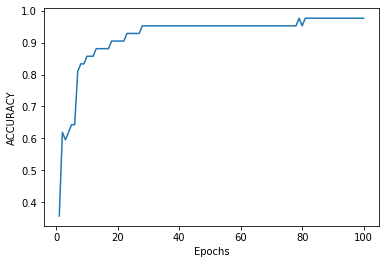

In [16]:
acc = model.history.history['acc']
plt.plot(range(1, len(acc) + 1), acc)
plt.xlabel('Epochs')
plt.ylabel('ACCURACY')
plt.show()

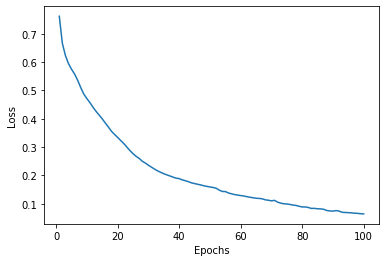

In [17]:
loss = model.history.history['loss']
plt.plot(range(1, len(loss) + 1), loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

## evaluating prdictions

In [18]:
model.evaluate(test_data, test_label)

141/141 [==============================] - 0s 42us/step


[0.55020420897937, 0.8014184236526489]

In [19]:
abs(model.predict(test_data))

array([[9.0039724e-01],
       [8.3127820e-01],
       [9.9898648e-01],
       [9.6995497e-01],
       [9.9579239e-01],
       [5.3607363e-01],
       [9.9824804e-01],
       [9.9822813e-01],
       [3.8532281e-01],
       [8.7594056e-01],
       [3.5605559e-01],
       [9.5172602e-01],
       [9.9503243e-01],
       [4.3877158e-01],
       [9.9277568e-01],
       [9.9514389e-01],
       [7.2971737e-01],
       [8.6564314e-01],
       [4.3291813e-01],
       [5.8100379e-01],
       [9.7363698e-01],
       [9.8717046e-01],
       [9.9748868e-01],
       [9.9844110e-01],
       [3.0297041e-04],
       [1.5945137e-03],
       [9.2735898e-01],
       [9.0045655e-01],
       [9.7619641e-01],
       [9.4035441e-01],
       [9.8228669e-01],
       [8.2112688e-01],
       [9.8378146e-01],
       [4.2798081e-01],
       [9.8202157e-01],
       [9.9909228e-01],
       [9.4812584e-01],
       [9.8573458e-01],
       [9.7911310e-01],
       [1.0971421e-01],
       [9.2947161e-01],
       [9.779510

In [20]:
# test_data

In [21]:
test_label

12     1
211    1
264    1
199    1
296    1
      ..
310    1
14     1
303    1
110    0
231    1
Name: label, Length: 141, dtype: int64

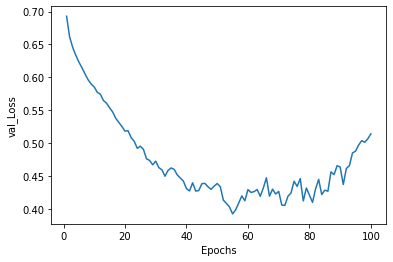

In [22]:
loss = model.history.history['val_loss']
plt.plot(range(1, len(loss) + 1), loss)
plt.xlabel('Epochs')
plt.ylabel('val_Loss')
plt.show()

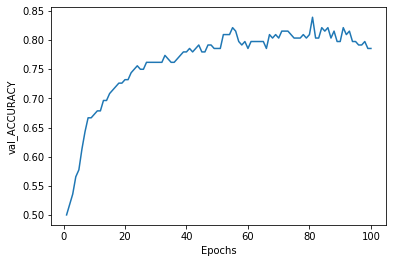

In [23]:
acc = model.history.history['val_acc']
plt.plot(range(1, len(acc) + 1), acc)
plt.xlabel('Epochs')
plt.ylabel('val_ACCURACY')
plt.show()